# **Advanced Data Mining**

Critical Thinking 12 

Rania Bahmid

Sentiment Analysis 

# Load libraries and dataset




In [ ]:
# Import the required libraries 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
#cleaning 
# !pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#Sentiment
from nltk.stem.porter import PorterStemmer
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Open and read Twitter US Airline Sentiment dataset CSV file 
USAirline_tweets= open("/content/Tweets.csv")

In [ ]:
# Convert data into dataframe
tweets = pd.read_csv(USAirline_tweets)

In [ ]:
# adding an row_id field to the dataframe, which will be useful for joining later
tweets["row_id"] = tweets.index + 1


In [ ]:
# Describe the data
# check number of rows and columns
nRow, nCol = tweets.shape
print(f'There are {nRow} rows and {nCol} columns')
# check the head 
print ("This is the head of the data \n",display (tweets.head()))
# check datatype, Non-Null Count and more info about the dataset
tweets.info()

There are 14640 rows and 16 columns


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,row_id
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),3
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),4
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),5


This is the head of the data 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created           

# EDA

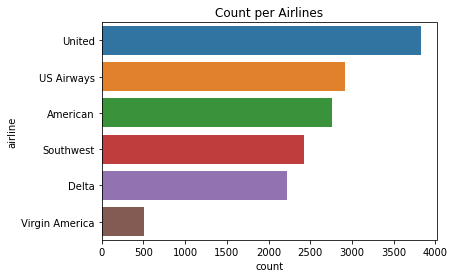

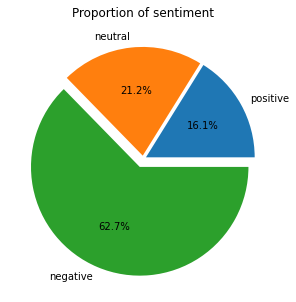

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


(9178, 16)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,row_id
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),4
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),5
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),6
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada),16
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada),18


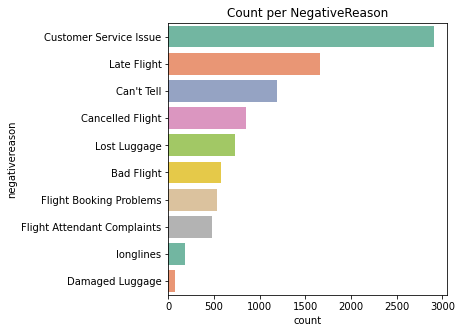

In [ ]:
#EDA
# Visualize Count per Airlines
count_per_airlines = sns.countplot(data = tweets, y = 'airline', order = tweets.airline.value_counts().index)
count_per_airlines.set_title('Count per Airlines',)
plt.show()

# Visualize Proportion of sentiment
sentiment_proportion = tweets.airline_sentiment.value_counts().sort_values()
plt.figure(figsize=(5, 5))
x = plt.pie(x = sentiment_proportion, labels=sentiment_proportion.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Proportion of sentiment')
plt.show()

# Sentiment classification count for each airline 
Sentiment_classification_count = tweets.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
display(Sentiment_classification_count)

# Negative sentiment only has the value of negativereason.
df_neg = tweets[tweets.airline_sentiment == 'negative']
display(df_neg.shape, df_neg.head()) 

#Visualize count per negativereason
plt.figure(figsize=(5,5))
ax= sns.countplot(data = df_neg, y = 'negativereason',
                   palette='Set2',
                   order = df_neg.negativereason.value_counts().index)
ax.set_title('Count per NegativeReason')
plt.show()

# Cleaning 

In [ ]:
#Cleaning
text_cleaning_df = tweets.copy()
stop_words = stopwords.words('english')
porter = PorterStemmer()

In [ ]:
# Tokenised Text
text_cleaning_df['word_tokenized_text'] = text_cleaning_df['text'].apply(lambda x: word_tokenize(x))
# Remove Puntuation
text_cleaning_df['word_remove_puntuation_text'] = text_cleaning_df['word_tokenized_text'].apply(lambda x: [w for w in x if w.isalpha()])
# Lower Case the all words
text_cleaning_df['lower_text'] = text_cleaning_df['word_remove_puntuation_text'].apply(lambda x: [w.lower() for w in x])
# Trimed leading and trailing spaces
text_cleaning_df['space_trimmed_text'] = text_cleaning_df['lower_text'].apply(lambda x: [w.strip() for w in x])
# Remove Stop words
text_cleaning_df['stop_words_removed_text'] = text_cleaning_df['space_trimmed_text'].apply(lambda x: [w for w in x if w not in stop_words])
# Steam Text
text_cleaning_df['stemmed_text'] = text_cleaning_df['stop_words_removed_text'].apply(lambda x: [porter.stem(w) for w in x])

# Check if specific word exist in tweets
text_cleaning_df['is_love'] = text_cleaning_df['stemmed_text'].apply(lambda x: 1 if 'love' in x else 0)
text_cleaning_df['is_good'] = text_cleaning_df['stemmed_text'].apply(lambda x: 1 if 'good' in x else 0)
text_cleaning_df['is_bad'] = text_cleaning_df['stemmed_text'].apply(lambda x: 1 if 'bad' in x else 0)

# Add processed setennce size
text_cleaning_df['sentence_size'] = text_cleaning_df['stemmed_text'].apply(lambda x: len(x))
text_cleaning_df['processed_text'] = text_cleaning_df['stemmed_text'].apply(lambda x: " ".join(x))
# Remove Neutral Data from dataset
text_cleaning_df = text_cleaning_df[(text_cleaning_df['airline_sentiment'] != 'neutral')]

#remove all non-aphabet characters
text_cleaning_df['text'] = text_cleaning_df['text'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
text_cleaning_df['text'] = text_cleaning_df['text'].str.casefold()
print (text_cleaning_df.head(10))

              tweet_id airline_sentiment  airline_sentiment_confidence  \
1   570301130888122368          positive                        0.3486   
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
6   570300616901320704          positive                        0.6745   
8   570299953286942721          positive                        0.6559   
9   570295459631263746          positive                        1.0000   
11  570289724453216256          positive                        1.0000   
12  570289584061480960          positive                        1.0000   
13  570287408438120448          positive                        0.6451   

   negativereason  negativereason_confidence         airline  \
1             NaN                     0.0000  Virgin America   
3      Bad Flight                     0.7033  Virgin Amer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: The default value of regex will change from True to False in a future version.


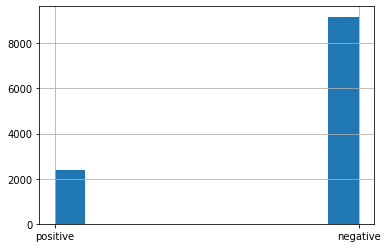

In [ ]:
#visulize airline_sentiment
text_cleaning_df['airline_sentiment'].hist()

# Generate sentiment polarity scores

In [ ]:
#create a new data frame with "id" and "text" fields
df_subset = text_cleaning_df[['row_id', 'text']].copy()


In [ ]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0


In [ ]:
#Derive and estimate the sentiment associated with individual tweets.
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0       2       compound           0.0000
0       4       compound          -0.2716
0       5       compound          -0.5829
0       6       compound          -0.5945
0       7       compound           0.7506
0       9       compound           0.1406
0      10       compound           0.7717
0      12       compound           0.7490
0      13       compound           0.6249
0      14       compound           0.0000


In [ ]:
#merge dataframes
df_output = pd.merge(text_cleaning_df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

In [ ]:
# #Store the output as a dataframe that contains the following columns: the tweet and the associated sentiment. 
#Display the head of this dataframe.
sentiment_output = df_output[['text','sentiment_score']].copy()
print(sentiment_output.head(10))

                                                text  sentiment_score
0   virginamerica plus you ve added commercials t...           0.0000
1   virginamerica it s really aggressive to blast...          -0.2716
2   virginamerica and it s a really big bad thing...          -0.5829
3   virginamerica seriously would pay     a fligh...          -0.5945
4   virginamerica yes  nearly every time i fly vx...           0.7506
5     virginamerica well  i didn t but now i do    d           0.1406
6   virginamerica it was amazing  and arrived an ...           0.7717
7   virginamerica i  lt   pretty graphics  so muc...           0.7490
8   virginamerica this is such a great deal  alre...           0.6249
9   virginamerica  virginmedia i m flying your #f...           0.0000


,sentiment_score
count,11541.000000
mean,0.122979
std,0.474105
min,-0.955500
25%,-0.250000
50%,0.102700
75%,0.510600
max,0.974000


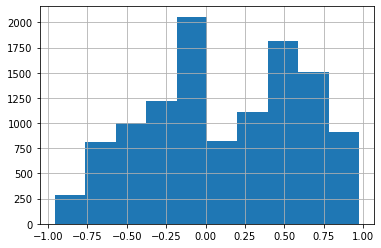

In [ ]:
#Visualize sentiment analysis output
sentiment_output['sentiment_score'].hist()
sentiment_output[["sentiment_score"]].describe()